In [4]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import csv

In [5]:
# Datos proporcionados
datos_ciudades = [
    {"ciudad": "A", "X": 1149.0, "Y": 1761.0},
    {"ciudad": "B", "X": 629.0, "Y": 1660.0},
    {"ciudad": "C", "X": 41.0, "Y": 2091.0},
    {"ciudad": "D", "X": 649.0, "Y": 1101.0},
    {"ciudad": "E", "X": 749.0, "Y": 2031.0},
    {"ciudad": "F", "X": 1030.0, "Y": 2069.0},
    {"ciudad": "G", "X": 1649.0, "Y": 651.0},
    {"ciudad": "H", "X": 1488.0, "Y": 1625.0},
    {"ciudad": "I", "X": 787.0, "Y": 2261.0},
    {"ciudad": "J", "X": 709.0, "Y": 1312.0},
    {"ciudad": "K", "X": 842.0, "Y": 551.0},
    {"ciudad": "L", "X": 1155.0, "Y": 2319.0},
    {"ciudad": "M", "X": 900.0, "Y": 1350.0},
    {"ciudad": "N", "X": 505.0, "Y": 710.0},
    {"ciudad": "O", "X": 650.0, "Y": 920.0},
    {"ciudad": "P", "X": 1380.0, "Y": 1200.0},
    {"ciudad": "Q", "X": 199.0, "Y": 590.0},
    {"ciudad": "R", "X": 365.0, "Y": 860.0},
    {"ciudad": "S", "X": 1030.0, "Y": 960.0},
    {"ciudad": "T", "X": 580.0, "Y": 1390.0},
    {"ciudad": "U", "X": 835.0, "Y": 1785.0},
    {"ciudad": "V", "X": 491.0, "Y": 514.0},
    {"ciudad": "W", "X": 1890.0, "Y": 1220.0},
    {"ciudad": "X", "X": 1250.0, "Y": 1600.0},
    {"ciudad": "Y", "X": 1290.0, "Y": 795.0},
    {"ciudad": "Z", "X": 495.0, "Y": 211.0},
]

# Nombre del archivo CSV de salida
nombre_archivo_csv = "datos_ciudades.csv"

# Escribir datos en el archivo CSV
with open(nombre_archivo_csv, mode="w", newline="") as archivo_csv:
    # Crear un escritor CSV
    escritor_csv = csv.DictWriter(archivo_csv, fieldnames=["ciudad", "X", "Y"])

    # Escribir la fila de encabezados
    escritor_csv.writeheader()

    # Escribir los datos de cada ciudad
    for ciudad in datos_ciudades:
        escritor_csv.writerow(ciudad)

print(f"Se ha generado el archivo CSV: {nombre_archivo_csv}")

Se ha generado el archivo CSV: datos_ciudades.csv


In [21]:
# índices a nombres de ciudades
indice_a_ciudad = {i: datos_ciudades[i]["ciudad"] for i in range(len(datos_ciudades))}


def calcular_distancia_total(ruta, ciudades):
    distancia_total = 0
    for i in range(len(ruta)):
        ciudad_actual = ciudades[ruta[i]]
        ciudad_siguiente = ciudades[ruta[(i + 1) % len(ruta)]]
        distancia = math.sqrt(
            (ciudad_actual["X"] - ciudad_siguiente["X"]) ** 2
            + (ciudad_actual["Y"] - ciudad_siguiente["Y"]) ** 2
        )
        distancia_total += distancia
    return distancia_total


class Particle:
    def __init__(self, nv, w, c1, c2, fitness_inicial):
        self.nv = nv
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.posicion_particula = list(range(nv))
        random.shuffle(self.posicion_particula)
        self.velocidad_particula = []
        self.mejor_posicion_local_particula = list(self.posicion_particula)
        self.fitness_mejor_posicion_local_particula = fitness_inicial
        self.fitness_posicion_particula = fitness_inicial

    def evaluate(self, funcion_objetivo):
        self.fitness_posicion_particula = funcion_objetivo(self.posicion_particula)
        if (
            self.fitness_posicion_particula
            < self.fitness_mejor_posicion_local_particula
        ):
            self.mejor_posicion_local_particula = list(self.posicion_particula)
            self.fitness_mejor_posicion_local_particula = (
                self.fitness_posicion_particula
            )

    def actualizar_velocidad(self, global_mejor_posicion_particula):
        r1 = random.random()
        r2 = random.random()
        self.velocidad_particula = []
        for i in range(self.nv):
            if r1 < 0.5:
                self.velocidad_particula.append(self.mejor_posicion_local_particula[i])
            if r2 < 0.5:
                self.velocidad_particula.append(global_mejor_posicion_particula[i])

    def actualizar_posicion(self):
        if len(self.velocidad_particula) > 0:
            i = random.randint(0, len(self.posicion_particula) - 1)
            j = random.randint(0, len(self.posicion_particula) - 1)
            self.posicion_particula[i], self.posicion_particula[j] = (
                self.posicion_particula[j],
                self.posicion_particula[i],
            )


class PSO:
    def __init__(
        self,
        funcion_objetivo,
        particle_size,
        iteraciones,
        inercia=0.8,
        cognitiva=1,
        social=2,
        num_variables=26,
    ):
        fitness_inicial = float("inf")
        self.nv = num_variables
        self.w = inercia
        self.c1 = cognitiva
        self.c2 = social
        self.funcion_objetivo = funcion_objetivo
        self.particle_size = particle_size
        self.iteraciones = iteraciones
        self.fitness_global_mejor_posicion_particula = fitness_inicial
        self.global_mejor_posicion_particula = []
        self.enjambre_particulas = []
        self.minimos = []
        self.minimizadores = []

        for i in range(self.particle_size):
            self.enjambre_particulas.append(
                Particle(self.nv, self.w, self.c1, self.c2, fitness_inicial)
            )

        for i in range(self.iteraciones):
            for j in range(self.particle_size):
                self.enjambre_particulas[j].evaluate(self.funcion_objetivo)
                if (
                    self.enjambre_particulas[j].fitness_posicion_particula
                    < self.fitness_global_mejor_posicion_particula
                ):
                    self.global_mejor_posicion_particula = list(
                        self.enjambre_particulas[j].posicion_particula
                    )
                    self.fitness_global_mejor_posicion_particula = (
                        self.enjambre_particulas[j].fitness_posicion_particula
                    )

            self.minimos.append(self.fitness_global_mejor_posicion_particula)
            self.minimizadores.append(self.global_mejor_posicion_particula)

            for j in range(self.particle_size):
                self.enjambre_particulas[j].actualizar_velocidad(
                    self.global_mejor_posicion_particula
                )
                self.enjambre_particulas[j].actualizar_posicion()

        print("Resultado:")
        print(
            "Distancia mínima encontrada: ",
            self.fitness_global_mejor_posicion_particula,
        )
        mejor_ruta = [
            indice_a_ciudad[indice] for indice in self.global_mejor_posicion_particula
        ]
        print("Mejor ruta encontrada: ", mejor_ruta)


# Preparar los datos de las ciudades para el PSO
ciudades = [{"X": ciudad["X"], "Y": ciudad["Y"]} for ciudad in datos_ciudades]


# Función objetivo para calcular la distancia total de una ruta
def funcion_objetivo(ruta):
    return calcular_distancia_total(ruta, ciudades)


# Configuración del PSO
pso = PSO(funcion_objetivo, particle_size=50, iteraciones=100)

Resultado:
Distancia mínima encontrada:  17604.02477742044
Mejor ruta encontrada:  ['R', 'N', 'Y', 'G', 'S', 'C', 'B', 'E', 'I', 'K', 'W', 'H', 'A', 'L', 'F', 'Z', 'V', 'D', 'O', 'M', 'J', 'X', 'T', 'U', 'P', 'Q']


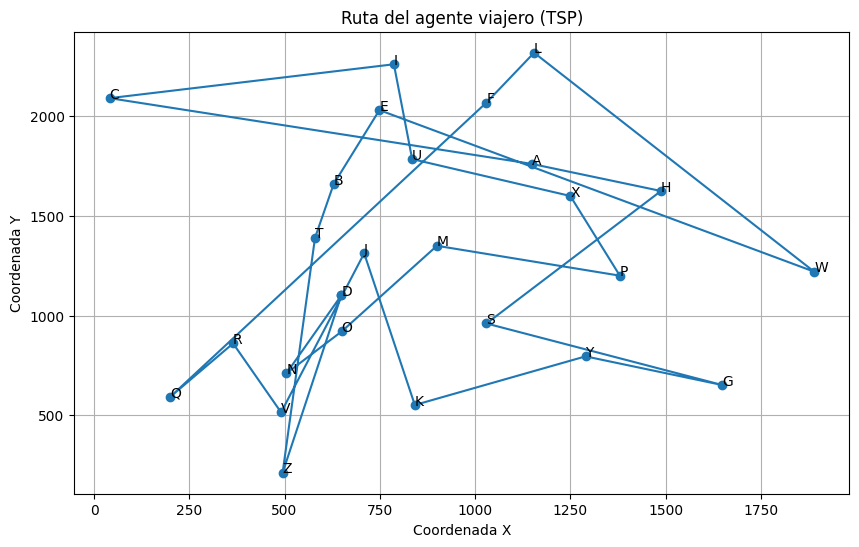

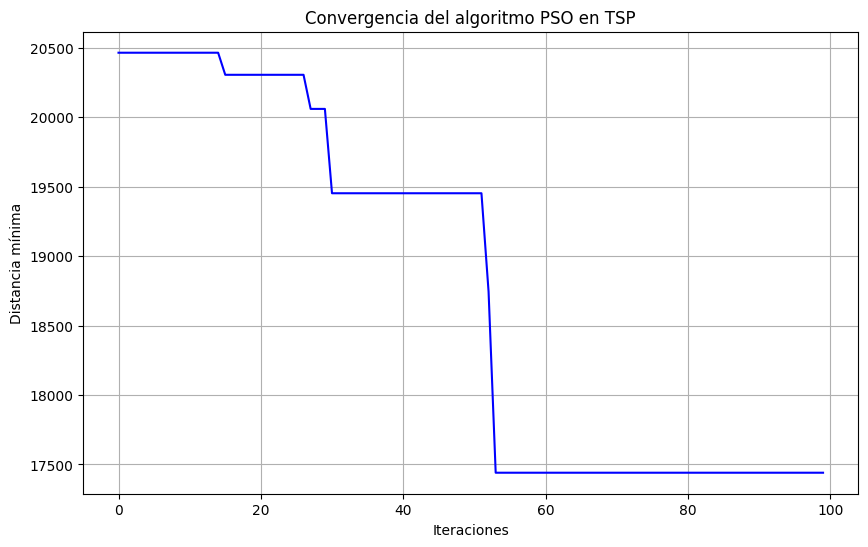

In [9]:
def graficar_ruta(ciudades, ruta):
    x = [ciudades[ciudad]["X"] for ciudad in ruta + [ruta[0]]]
    y = [ciudades[ciudad]["Y"] for ciudad in ruta + [ruta[0]]]
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, "o-")
    for i, ciudad in enumerate(ruta):
        plt.text(ciudades[ciudad]["X"], ciudades[ciudad]["Y"], chr(65 + ciudad))
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.title("Ruta del agente viajero (TSP)")
    plt.grid()
    plt.show()


def graficar_convergencia(historial_minimos):
    plt.figure(figsize=(10, 6))
    plt.plot(historial_minimos, "b-")
    plt.xlabel("Iteraciones")
    plt.ylabel("Distancia mínima")
    plt.title("Convergencia del algoritmo PSO en TSP")
    plt.grid()
    plt.show()


# Graficar los resultados
graficar_ruta(ciudades, pso.global_mejor_posicion_particula)
graficar_convergencia(pso.minimos)